In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from numpy import mean
from numpy import std
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder

In [2]:
breast_cancer=load_breast_cancer()
X=pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)
y=pd.Categorical.from_codes(breast_cancer.target,breast_cancer.target_names)

In [3]:
le=LabelEncoder()
end_y=pd.Series(le.fit_transform(y))

In [15]:
#define the base model(simple decision tree)
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=42)
score=cross_val_score(DT,X,end_y,scoring='f1',cv=cv,n_jobs=-1)
print('Mean Score using DT:',score.mean())

#Bagging with random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=42)
score=cross_val_score(rf,X,end_y,scoring='f1',cv=cv,n_jobs=-1)
print('Mean Score using RF:',score.mean())


Mean Score using DT: 0.8929544459479584
Mean Score using RF: 0.9436590322977164


In [27]:
#using hyperparameter:Random forest

X_train,X_test,y_train,y_test=train_test_split(X,end_y,test_size=.2,random_state=42)

rf=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42,n_jobs=-1,oob_score=True)
model=rf.fit(X_train,y_train)
model.oob_score_



0.9582417582417583

In [38]:
#Hyper parameter tuning for Random Forest using GridSearchCV

rf=RandomForestClassifier(random_state=42,n_jobs=-1)
param={'max_depth':[2,3,5,10,20],'min_samples_leaf':[5,10,20,50,100,200],'n_estimators':[10,25,30,50,100,200]}
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(estimator=rf,param_grid=param,cv=4,n_jobs=-1,verbose=3,scoring='accuracy')
gs.fit(X_train,y_train)
best_estm=gs.best_estimator_
print('Accuracy',gs.best_score_)
print('Parameter',best_estm)


Fitting 4 folds for each of 180 candidates, totalling 720 fits
Accuracy 0.9538115199503183
Parameter RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=30,
                       n_jobs=-1, random_state=42)


In [34]:
best_estm.feature_importances_
imp_df=pd.DataFrame({'Var_name':X_train.columns,'Important':best_estm.feature_importances_})
imp_df.sort_values(by='Important',ascending=False)

,Var_name,Important
7,mean concave points,0.154860
27,worst concave points,0.142330
23,worst area,0.111421
6,mean concavity,0.092350
0,mean radius,0.068644
2,mean perimeter,0.059090
22,worst perimeter,0.051070
3,mean area,0.048996
13,area error,0.048700
20,worst radius,0.041524


[Text(0.5795454545454546, 0.9375, 'area error <= 31.285\ngini = 0.472\nsamples = 277\nvalue = [281, 174]\nclass = benign'),
 Text(0.38636363636363635, 0.8125, 'worst perimeter <= 114.6\ngini = 0.199\nsamples = 183\nvalue = [261, 33]\nclass = benign'),
 Text(0.2727272727272727, 0.6875, 'worst concavity <= 0.401\ngini = 0.103\nsamples = 173\nvalue = [259, 15]\nclass = benign'),
 Text(0.18181818181818182, 0.5625, 'mean area <= 702.75\ngini = 0.046\nsamples = 159\nvalue = [247, 6]\nclass = benign'),
 Text(0.13636363636363635, 0.4375, 'worst concave points <= 0.139\ngini = 0.024\nsamples = 154\nvalue = [241, 3]\nclass = benign'),
 Text(0.09090909090909091, 0.3125, 'concavity error <= 0.023\ngini = 0.008\nsamples = 149\nvalue = [234, 1]\nclass = benign'),
 Text(0.045454545454545456, 0.1875, 'gini = 0.0\nsamples = 103\nvalue = [164, 0]\nclass = benign'),
 Text(0.13636363636363635, 0.1875, 'concavity error <= 0.026\ngini = 0.028\nsamples = 46\nvalue = [70, 1]\nclass = benign'),
 Text(0.0909090

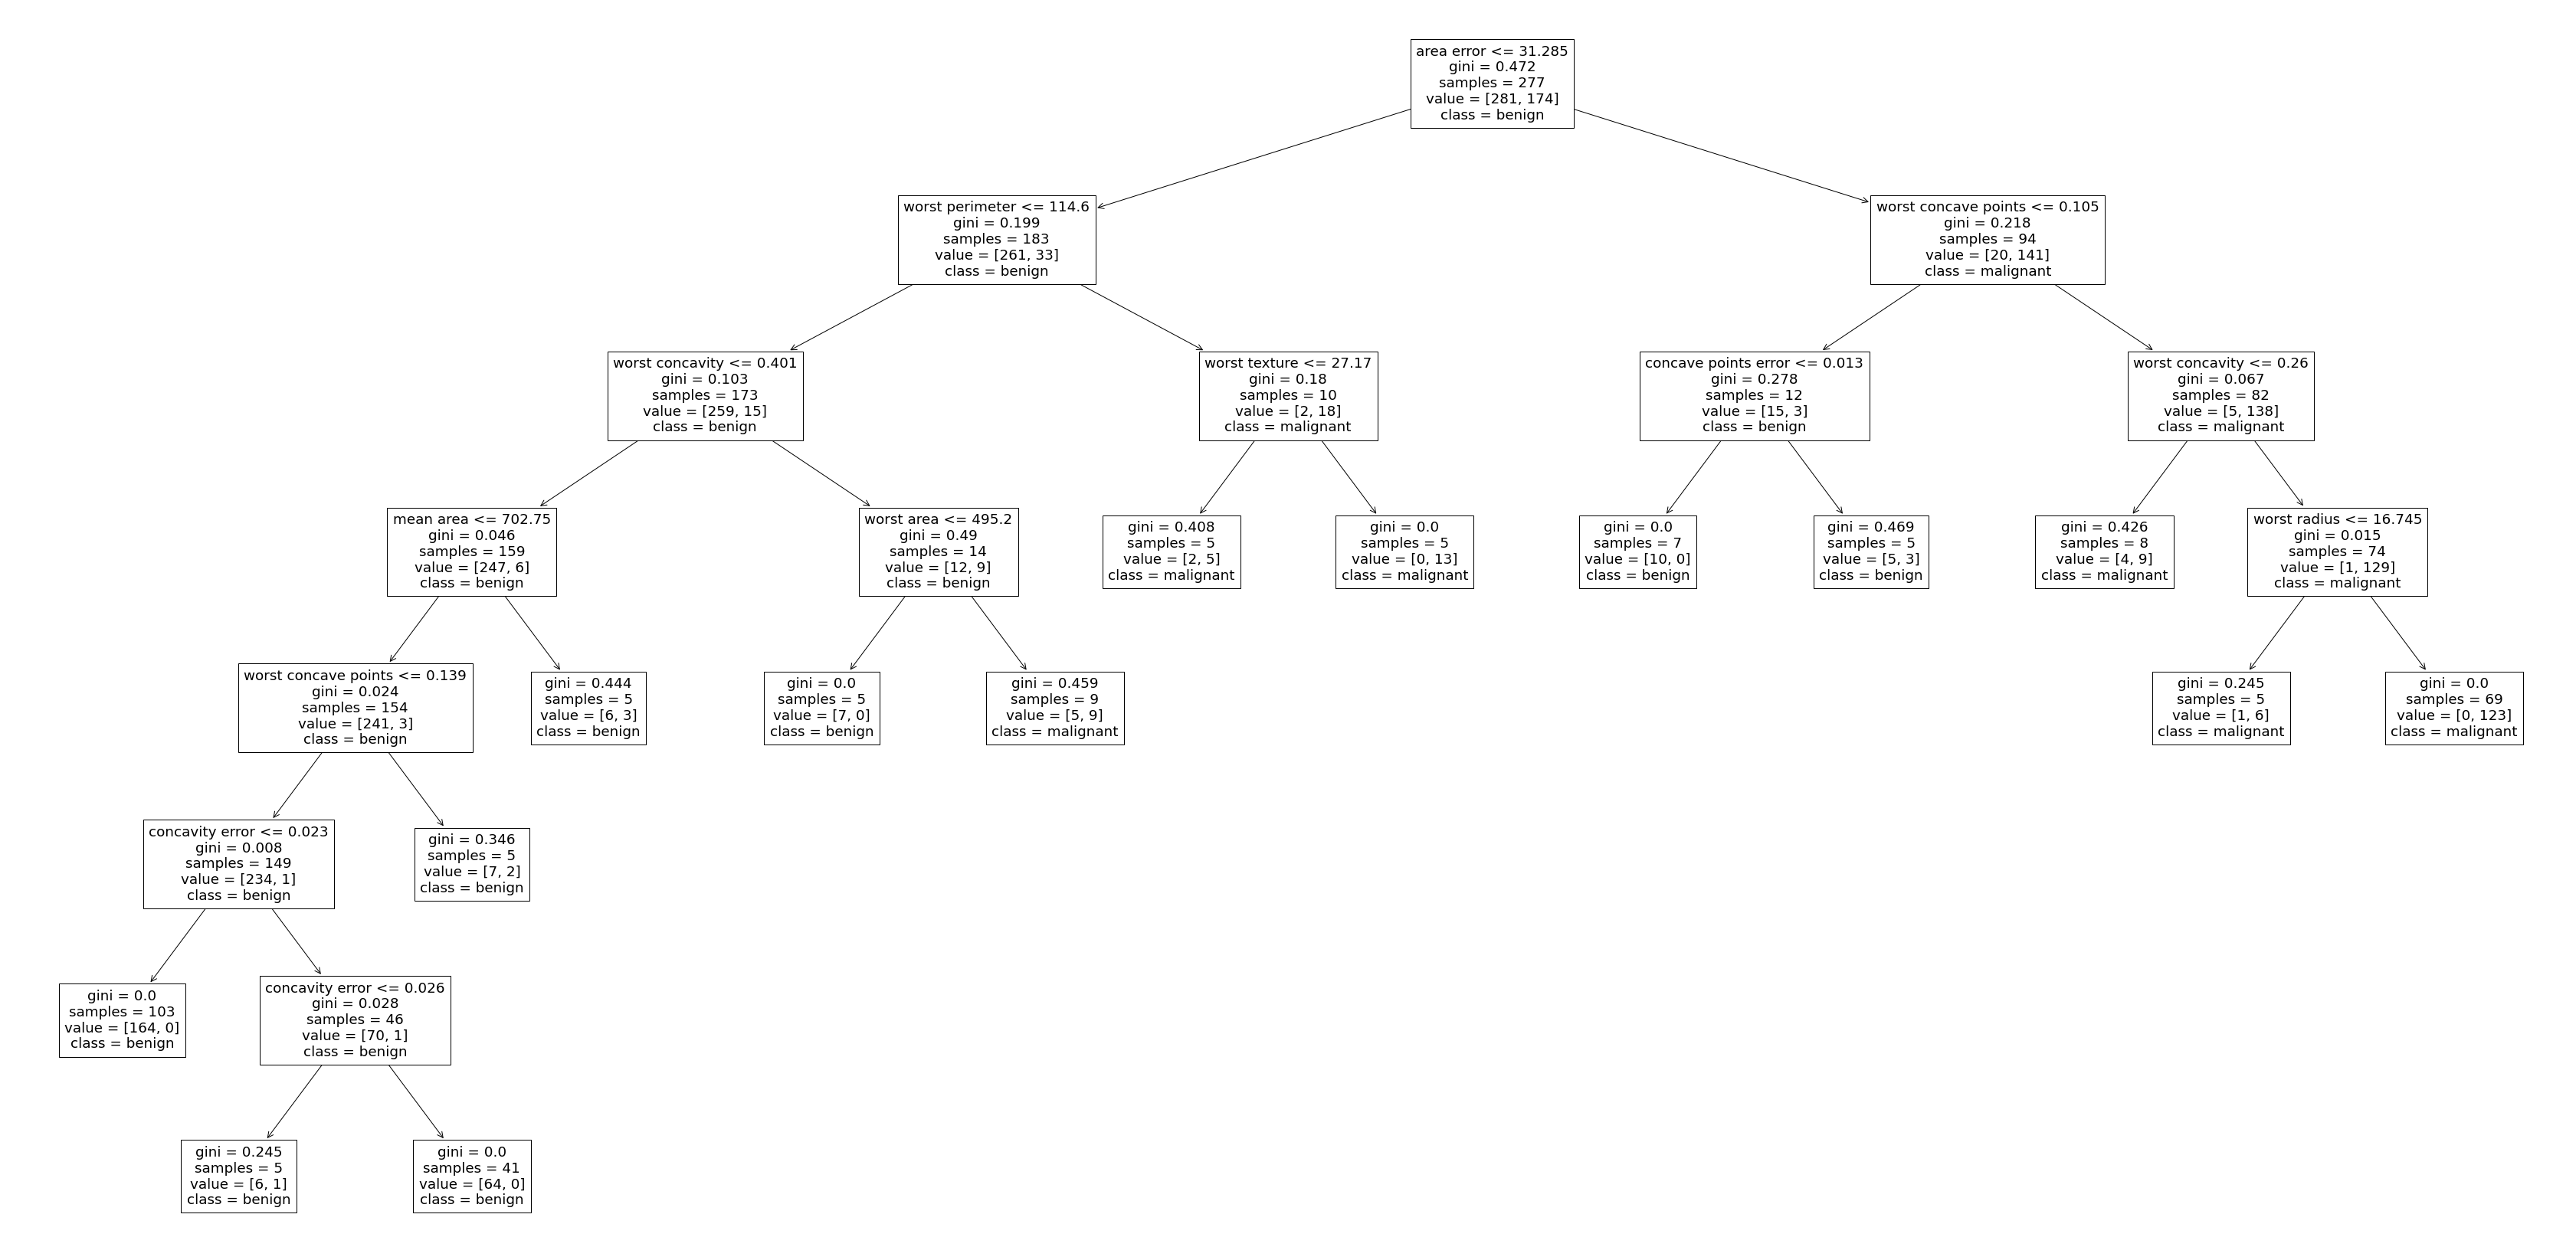

In [37]:
#visulization

from sklearn.tree import plot_tree

rf=RandomForestClassifier()
plt.figure(figsize=(60,30))
plot_tree(best_estm.estimators_[4],feature_names=X.columns,class_names=['benign','malignant'])